# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
#открываем файл и ставим разделить между данными
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#после расставления пробелов повторно выводим таблицу на экран и изучаем данные
display(data.head(10))
#смотрим общею инофрмацию по данным из таблицы
display(data.info())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

При проведенном общем анализе видны колонки, где необходима предобработка данных. Необходимо поработать с пропусками в колонках, проверить наличие дубликатов данных.
**Выводы по данным **

- first_day_exposition - должны быть в формате datetime
- ceiling_height - есть нулевые значения
- floors_total - должны быть в формает  int, так как количесво этажей - это целое число
- living_area - есть нулевые значения
- is_apartment - формат должент быть bool, наличие нулевых значений допустимо
- kitchen_area -есть нулевые значения
- balcony - есть нулевые значения
- locality_name - есть нулевые значения, их изменять не будем, так как причина пропусков не ясна
- airports_nearest, cityCenters_nearest,parks_around3000, parks_nearest, ponds_around3000, ponds_nearest  - есть нулевые значения 
- days_exposition - есть нулевые значения, также нужно округлить данные и изменить ихформат на целочисленный - int


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

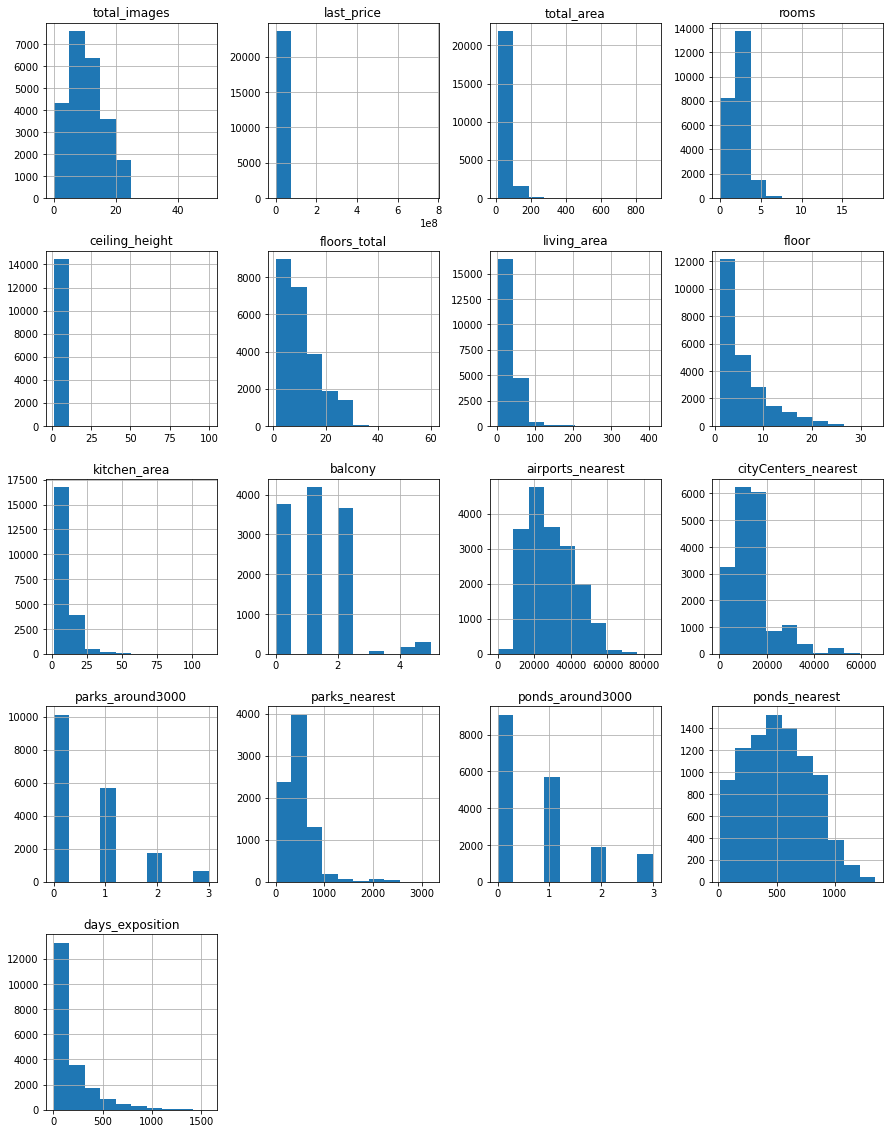

In [2]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [290]:
#изменим формат данных в колонке first_day_exposition
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

#замена пропущенных значений в кололке is_apartment на False и замена типа данных
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype('bool')

#изменнеие формата в колонке floors_total
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total']=data['floors_total'].astype('int')

#изменнеие формата в колонке days_exposition
data['days_exposition'] = data['days_exposition'].fillna(0)
data['days_exposition'] = round(data['days_exposition'])
data['days_exposition']=data['days_exposition'].astype('int')
#print(sorted(data['days_exposition'].sort_values().unique()))

#замена пропущенных значений в колонке balcony на 0 и изменим тип данных на int
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

#замена пропущенных значений в колонке  на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['living_area'] = data['living_area'].fillna(0)
data['locality_name'] = data['locality_name'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

#подсчет количества дубликатов в таблице
#print(data.duplicated().sum())

#проверка наличия неявных дубликатов
#print(data['locality_name'].unique())

#намена неявных дубликатов
data['locality_name']=data['locality_name'].replace('ё', 'е', regex=True).replace('Ё', 'Е', regex=True)
old1 = ['городской поселок', 'поселок городского типа', 'коттеджный поселок']
data['locality_name']=data['locality_name'].replace( old1, 'поселок', regex=True)
data['locality_name']=data['locality_name'].replace('садоводческое некоммерческое товарищество', 'садовое товарищество', regex=True)
data['locality_name']=data['locality_name'].replace('поселок при железнодорожной станции', 'поселок станции', regex=True)

#замена пропщущенных значений на 0 и поиск редких и выбивающихся значений в колонке ceiling_height
data['ceiling_height'] = data['ceiling_height'].fillna(0)
data['ceiling_height']=data['ceiling_height'].replace(20.0, 2).replace(22.6, 2.26).replace(24.0, 2.4).replace(25.0, 2.5).replace(26.0, 2.6).replace(27.0, 2.7).replace(27.5, 2.75).replace(32.0, 3.2)
#print(sorted(data['ceiling_height'].sort_values().unique()))
#print(data['ceiling_height'].describe())
data.isnull().sum()



total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

Меняем формат данных в колонке first_day_exposition, чтобы с датами можно было проводить анализ по дням, месяцам, годам.

Пропущенные значения  nan заменим на 0, чтобы было удбно проводить обработку данных.

После применения метода describe к анализу данных в графе ceiling_height становится понятно, что большая
часть данных о высоте потолка находится в рамках стандарта 2,7 - 2,8 м.

В значениях потолка с 20 по 32 скорее всего допущена ошибка и необходимо поставить запятую.
Значения с 1, 1,2 слишком маленькие, почему не ясно, их следует удалить из анализируемой таблицы.
В аномально большом значении 100 допушена ошибка, его также удалим.  
Подсчитав процентные доли квартр с потолками ниже 2м и выше 10.3 м, они составили около 0,004%, что несущственно для исследвоания, пока эти данные не удаляю.



### Посчитайте и добавьте в таблицу новые столбцы

In [291]:
#цена одного квадратного метра;
data['price_per_1m2'] = data['last_price']/data['total_area']

#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
data['publication_day']=data['first_day_exposition'].dt.weekday

#месяц публикации объявления;
data['publication_month']=data['first_day_exposition'].dt.month

#год публикации объявления;
data['publication_year']=data['first_day_exposition'].dt.year

#тип этажа квартиры (значения — «‎первый», «последний», «другой»);
data.loc[data['floor']==1,'floor_type'] = 'первый'
data.loc[data['floor']!=1,'floor_type'] = 'другой'
data.loc[data['floor']==data['floors_total'],'floor_type'] = 'последний'

#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['center_km']=round(data['cityCenters_nearest']/1000)

### Проведите исследовательский анализ данных

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

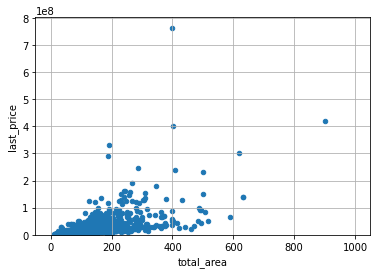

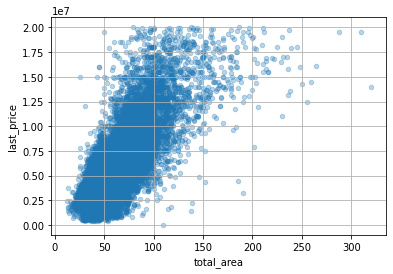

In [292]:
#общая площадь

data.plot(x='total_area', y = 'last_price', kind='scatter', grid=True)
data['total_area'].hist(bins=100, range = (0,1000))
data_total_area=data.query('total_area <200')
data_total_area=data.query('last_price <20000000')
data_total_area.plot(x='total_area', y = 'last_price', kind='scatter', grid=True, alpha=0.3)
data['last_price'].describe()


Большая часть квартир в продаже имеет площадь от 25 до 125 м2 и находится в ценовом сегменте ниже 15 млн.руб

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

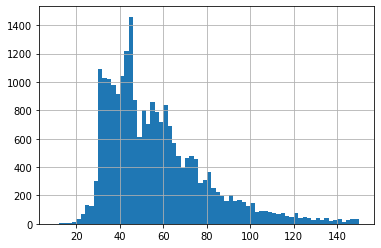

In [293]:
#жилая площадь

data['total_area'].hist(bins=70, range = (10,150))
data['total_area'].describe()

Самые распространённые варианты с жилой площадью 30,45,60 м2. до 50 метро, число квартир с жилой площадью более 80  м2 встречаются редко.
Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

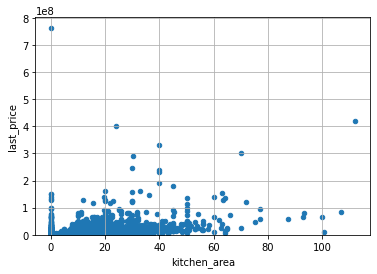

In [294]:
#площади кухни
data.plot(x='kitchen_area', y = 'last_price', kind='scatter', grid=True)
data['kitchen_area'].hist(bins=70, range = (3,80))

In [ ]:
Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. 
Больше 30 - единичные случаи.
цена квартиры не сильно зависит от размера кухни.

<AxesSubplot:>

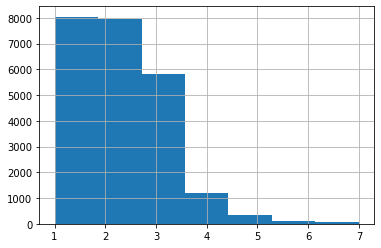

In [295]:
#количество комнат
data['rooms'].hist(bins=7, range = (1,7))

In [ ]:
В основном квартиры состоят из 1, 2 и 3 комнат, есть небольшая доля 4-комнатных квартир. 
Варинатов с комнатами более 5 мало.

<AxesSubplot:>

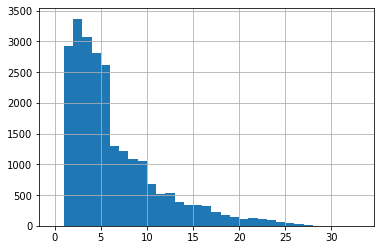

In [297]:
#этажа, на котором расположена квартира (первый, последний, другой)
data['floor'].hist(bins=33, range = (0,33))

In [ ]:
Большая часть квартир расположена с 1-10 этаж, число квартир, на около 1/3 квартир находится на первом или последнем
этаже дома

<AxesSubplot:>

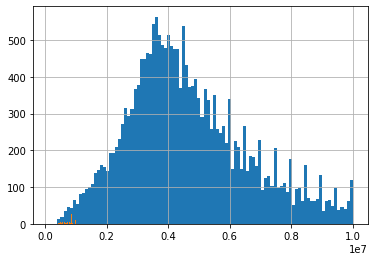

In [264]:
#цена объекта
data['last_price'].hist(bins=100, range = (100000,10000000))
data['last_price'].hist(bins=100, range = (200000,1000000))

Больая часть квартир представлена в цене около 8-10 млн.руб.

<AxesSubplot:>

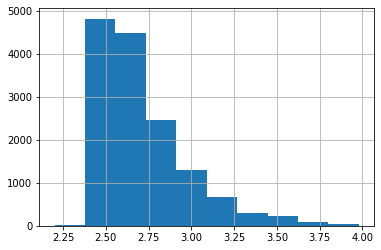

In [265]:
#высота потолков, убираем аномалии потолку нижу 2 м и выше 4.
data_data_ceiling_height = data.query(('(ceiling_height > 2) & (ceiling_height < 4)'))
data_data_ceiling_height['ceiling_height'].hist()

 Основная масса квартир имеет стандартную высоту потолков: 2,5-2,75 м.

<AxesSubplot:>

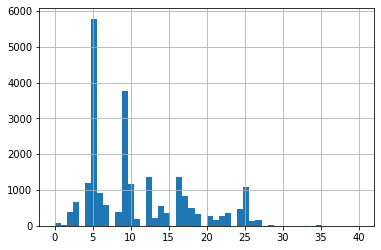

In [266]:
#общее количество этажей в доме;
data['floors_total'].hist(bins=50, range=(0,40)) 

Большинство квартир  - здания с 5 и 10 этажами. 

<AxesSubplot:>

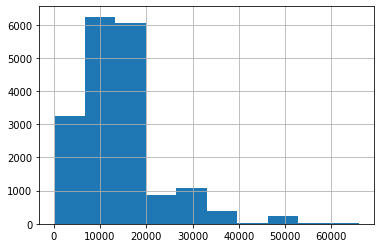

In [267]:
#расстояние до центра города в метрах;берем для анализа срез данных, где квартиры удалены более,чем на 1 м, так как 
#при первично анализе было много пропущенных данных, вместо них мы поставили 0, а это может искать результат и
#показать неверную зависимость от цены
data_cityCenters_nearest=data.query('cityCenters_nearest>0')

#data_cityCenters_nearest.plot(x='cityCenters_nearest', y = 'last_price', kind='scatter', grid=True)
data_cityCenters_nearest['cityCenters_nearest'].hist()

Большая часть квартир находится на расстоянии 20 км от Центра города

<AxesSubplot:>

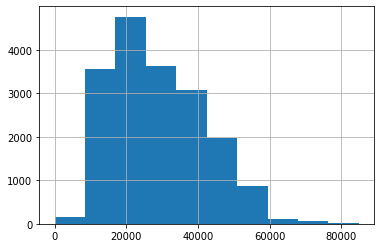

In [268]:
#расстояние до ближайшего аэропорта; аналогнично удаляем квартры, расположенные 0 км от аэропорта
data_airports_nearest=data.query('airports_nearest>0')
data_cityCenters_nearest['airports_nearest'].hist()

Большая часть квартир значительно удалена от аэропорат, что хорошо, не будет слышен лишний шум

<AxesSubplot:>

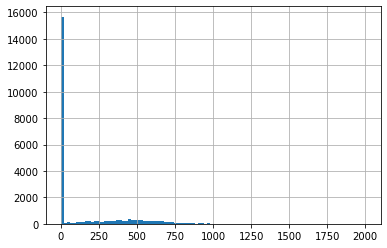

In [269]:
#расстояние до ближайшего парка;
#расстояние до ближайшего аэропорта; аналогнично удаляем квартры, расположенные 0 км от аэропорта

data['parks_nearest'].hist(bins=100, range=(0,2000))

По значительном числу квартир у нас нет данных о наличии парка рядом. Поэтому этот фактор не следует включать в анализ цены.

<AxesSubplot:>

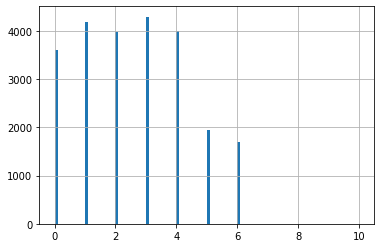

In [270]:
#день публикации объявления
data['publication_day'].hist(bins=100, range=(0,10))  

<AxesSubplot:>

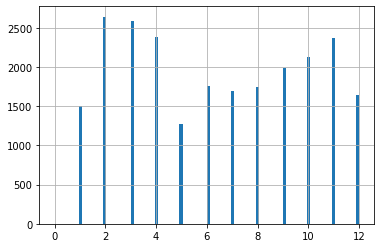

In [271]:
#месяц публикации объявления
data['publication_month'].hist(bins=100, range=(0,12))


Основная часть объявлений публикуется с воскресенья по четверг.
В течение года наиболее активыне месяцы: февраль-апрель, и сентябрь-ноябрь. Периоды затишья, скорее всего, связаны 
с майскими праздниками, летними отпусками и ногогодними месяцами.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
Среднее число дней продажи квартиры составляет: 181
Медиана дней продажи квартиры равна: 95.0


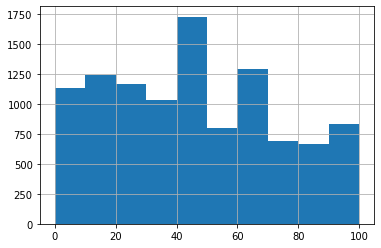

In [3]:
#как быстро продавались квартиры (столбец days_exposition)
#гистограмма
#подсчет средней и медианы.

data['days_exposition'].hist(range=(0,100))
print(data['days_exposition'].describe())
print('Среднее число дней продажи квартиры составляет:',round(data['days_exposition'].mean()))
print('Медиана дней продажи квартиры равна:',data['days_exposition'].median())

 Большинство квартира  в среднем продается в течение 157 дней.
 Быстрой продажей можно назвать срок в 22 дня и меньше. Долгой продажей - 199 дней и дольше.

Корреляция цены и площади: 0.6536750579657242


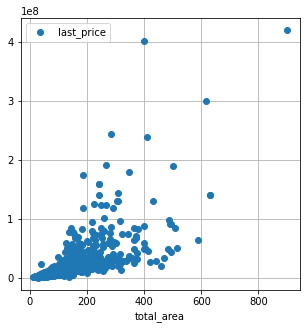

In [273]:
#факторы,которые  больше всего влияют на общую (полную) стоимость объекта
#графики, которые покажут зависимость цены от указанных ниже параметров
(
    data.pivot_table(index='total_area', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)

print('Корреляция цены и площади:',data['total_area'].corr(data['last_price']))


Корреляция цены и жилой площадью: 0.49070560990682593


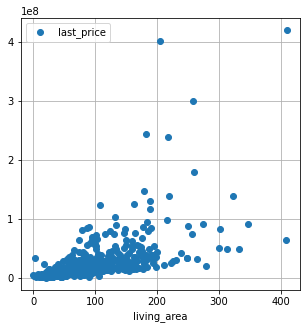

In [274]:
(
    data.pivot_table(index='living_area', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)

print('Корреляция цены и жилой площадью:',data['living_area'].corr(data['last_price']))

Корреляция цены и  площади кухни: 0.3864437841938422


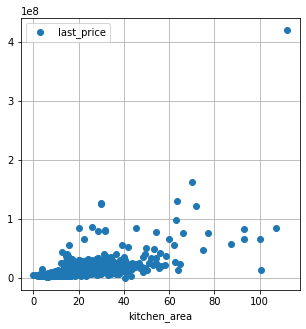

In [275]:
(
    data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)

print('Корреляция цены и  площади кухни:',data['kitchen_area'].corr(data['last_price']))

Корреляция цены и этажа: 0.026575643284470797


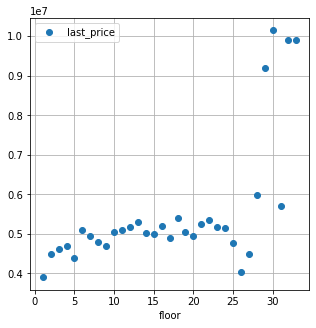

In [276]:
(
    data.pivot_table(index='floor', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)

print('Корреляция цены и этажа:',data['floor'].corr(data['last_price']))

Корреляция цены и числа комнат: 0.3633428499648948


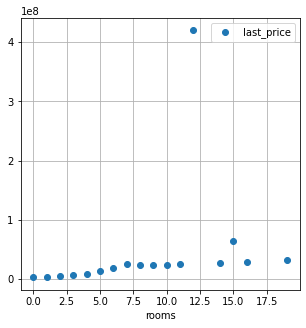

In [277]:
(
    data.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)

print('Корреляция цены и числа комнат:',data['rooms'].corr(data['last_price']))

<AxesSubplot:xlabel='floor_type'>

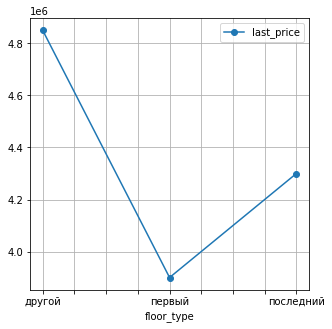

In [278]:
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)


Корреляция цены и дня публикации объявления: 0.0015501452176215405


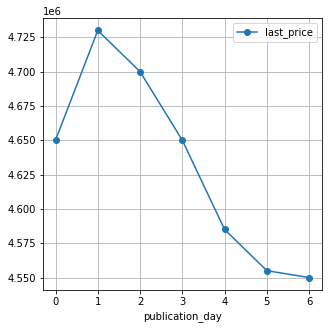

In [279]:
(
    data.pivot_table(index='publication_day', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

print('Корреляция цены и дня публикации объявления:',data['publication_day'].corr(data['last_price']))

Корреляция цены и месяца публикации объявления: 0.0027791287507397166


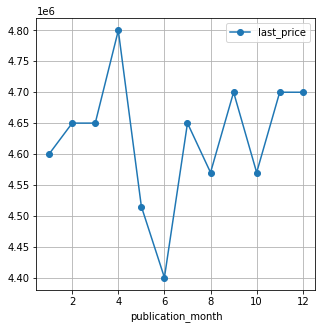

In [280]:
(
    data.pivot_table(index='publication_month', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

print('Корреляция цены и месяца публикации объявления:',data['publication_month'].corr(data['last_price']))

Корреляция цены и года публикации: -0.043089036199508615


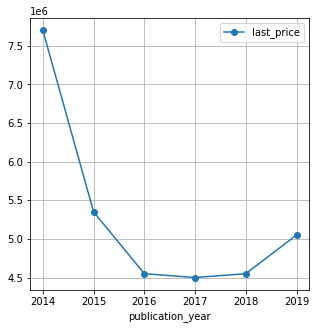

In [281]:
(
    data.pivot_table(index='publication_year', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

print('Корреляция цены и года публикации:',data['publication_year'].corr(data['last_price']))

**Выводы**
Чем больше площадь, тем выше стоимость, корреляция этих параметров высокая. 
Размер жилой площади также влияет на стоимость квартиры, но уже меньше.
Зависимость цены от площади кухни крайне низкая.
Также цена квартиры не зависит от этажа, думаю это можно обяснить тем, чтодругие факторы болоее сильно влияют на стоимость.

Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. 


Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

День недели: дороже всего квартиры, опубликованные в понедельник (цифра 1), дешевле всего - в субботу (цифра 6 н графике).
Месяц: дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.
Год: квартиры очень сильно подешевели в 2014-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика стала восстанавливться.

In [282]:
#средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
#населённые пункты с самой высокой и самой низкой стоимостью квадратного метра
city_10 = data['locality_name'].value_counts().head(10)
city_m2_price = data.query('locality_name in (@city_10.index)').pivot_table(values='price_per_1m2', index='locality_name')
city_m2_price = city_m2_price.astype(int)
display('Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:', city_m2_price.sort_values('price_per_1m2', ascending=False))

'Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:'

,price_per_1m2
locality_name,
Санкт-Петербург,114849
Пушкин,103125
деревня Кудрово,92473
поселок Парголово,90175
поселок Мурино,85681
поселок Шушары,78677
Колпино,75424
Гатчина,68746
Всеволожск,68654


<AxesSubplot:xlabel='center_km'>

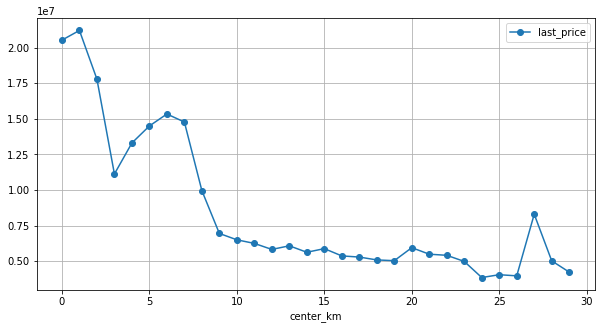

In [287]:
#выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену 
#каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
data_SP = data.query('locality_name == "Санкт-Петербург"')

# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
data_SP.pivot_table(index= 'center_km', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))



Чем ближе к центре Санкт-Петербурга расположен объект недвижимости, тем он дороже его стоимость.

### Общий вывод

Срок продажи квартиры

Чаще всего квартиру продают за 157 дней. Если меньше 22 дней, то это быстро, если дольше 199 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

Факторы, влияющие на стоимость

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.
Стоимость квадратного метра в топ-10 населённых пунктов

Дороже всего квадратный метр в Санкт-Петербург- 114 849
Дешевле всего квадратный метр в деревне Выборг	 - 58 141

Факторы, влияющие на стоимость в центре Санкт-Петербурга

Чем ближе квартира расположена к центру города, тем выше ее стоимость.